INTRODUCTION



In [1]:
#All initial things should be done here

import pandas as pd
import matplotlib as plt
import seaborn as sns
import glob
import os

%matplotlib inline

***
In data I use, And each of them needs to be cleaned 
to be ready for the further analysis. Therefore, I created some functions which are used for all the datasets. 
***

In [2]:
#All needed functions defined here



#used to call other functions and return a clean dataframe having clean and needed data inside. 
def main_clean_func (df_, flag):
    
    df_ = tweak_columns (df_, flag)
    df_ = tweak_data (df_, flag)  
    
    return df_
    
  
    
#Cleaning the columns
def tweak_columns (df_, flag):
    
    if flag == 'P':
        df_= df_.rename(columns={'Pos': 'Position', 'MP': 'Matches_Played', 'Min':'Mins_Played',
                             'Gls':'Goals', 'Ast':'Assists'})
        df_ = df_[['Player', 'Nation','Season', 'Position', 'Age', 'Matches_Played','Mins_Played', 'Goals', 'Assists', 
                   'CrdY', 'CrdR' ]]
    else : 
        df_= df_.rename(columns={'Rk': 'Ranking', 'MP': 'Matches_Played',
                             'W':'Wins', 'D':'Draws', 'L':'Loses', 'Top Team Scorer': 'Top_Scorer'})
        
        df_ = df_[['Ranking', 'Squad', 'Season', 'Matches_Played', 'Wins', 'Draws', 'Loses', 'Top_Scorer']]   
        
    return df_



#Cleaning the squad data and make it useful for the further steps. 
def tweak_data(df_, flag):
    
    if flag == 'P': 
        df_ = (df_
            .assign(Player = df_.Player.str.split("\\").map(lambda x: x[0]).str.strip(),
                    Nation=df_.Nation.str.split(" ").map(lambda y: y[1]) )
           )  
       
    else : #Sergio Agüero - 21	
                
        df_ = (df_
            .assign(Top_Scorer = df_.Top_Scorer.str.split("-").map(lambda x: x[0]).str.strip(),
                    Top_Scorer_Score = df_.Top_Scorer.str.split("-").map(lambda x: x[1])
                )
              )
        #df_ = df_.set_index('Squad')
        
        #squads = ['Liverpool', 'Manchester City', 'Manchester Utd']
                    
        #df_ = df_.loc[[x for x in squads],:]
    
    
    #dropping NaN/Null records..
    df_ =  df_.dropna()
    
    #dropping duplicate rows if any exist..
    df_ = df_.drop_duplicates()
    
    return df_



#calculating percentage of a certain column and total sum of that column for a given dataframe 
def percentage_data(df_, col1, tot_col1, name_of_new_col):
    df_[name_of_new_col] = round(((col1*100)/tot_col1), 2)
    return df_

        

***

Now, fetching data for Manchester United only for 2018-2019.. 

As it is shown in the output below, I need to do some cleaning to make it ready for the data analysis. 

Some issues are listed above:

- Player names are written double and delimited by '\\'
- Nation names are written double
- Not all column names are understandable. 
- No need to have all the columns in place.

***


In [3]:
df_sq_mu_20192020= pd.read_csv('data/manchesterunited_2019_2020.csv')


df_sq_mu_20192020.head()


,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,...,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,David de Gea\David-de-Gea,es ESP,GK,28,38,38,3420.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
1,Harry Maguire\Harry-Maguire,eng ENG,DF,26,38,38,3420.0,1.0,1.0,0.0,...,0.05,2.0,2.0,0.6,0.05,0.01,0.07,0.05,0.07,Matches
2,Victor Lindelöf\Victor-Lindelof,se SWE,DF,25,35,35,3092.0,1.0,0.0,0.0,...,0.03,0.4,0.4,0.3,0.01,0.01,0.02,0.01,0.02,Matches
3,Aaron Wan-Bissaka\Aaron-Wan-Bissaka,eng ENG,DF,21,35,34,3070.0,0.0,4.0,0.0,...,0.12,0.9,0.9,2.9,0.03,0.08,0.11,0.03,0.11,Matches
4,Marcus Rashford\Marcus-Rashford,eng ENG,FW,21,31,31,2643.0,17.0,7.0,6.0,...,0.61,17.3,11.2,4.6,0.59,0.16,0.74,0.38,0.54,Matches


In [4]:
df_stats_20192020 = pd.read_csv('data/Stats__2019_2020.csv')

df_stats_20192020.head()

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,xG,xGA,xGDiff,xGDiff/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,38,32,3,3,85,33,52,99,71.5,40.0,31.5,0.83,41955,Mohamed Salah - 19,Alisson,→ UEFA Champions League via league finish
1,2,Manchester City,38,26,3,9,102,35,67,81,93.0,34.7,58.3,1.53,37097,Raheem Sterling - 20,Ederson,→ UEFA Champions League via league finish
2,3,Manchester Utd,38,18,12,8,66,36,30,66,59.4,37.4,22.0,0.58,57415,Marcus Rashford Anthony Martial - 17,David de Gea,→ UEFA Champions League via league finish
3,4,Chelsea,38,20,6,12,69,54,15,66,66.6,37.9,28.6,0.75,32023,Tammy Abraham - 15,Kepa Arrizabalaga,→ UEFA Champions League via league finish
4,5,Leicester City,38,18,8,12,67,41,26,62,61.6,44.5,17.1,0.45,25312,Jamie Vardy - 23,Kasper Schmeichel,→ UEFA Europa League via league finish


***

As such, in the coming cells, I call the functions that I have written above to tweak the table and the data inside...

***


In [5]:
csv_files = glob.glob('data/Stats*csv')

dataframes = []

for file in csv_files:
    
    df = pd.read_csv(file)
    df['Season'] = (os.path.basename(file)
                    .split("__")[1].split('.')[0]
                    .replace("_", "-") )
    dataframes.append(df)
    
df_all_stats = pd.concat(dataframes, ignore_index=True)

df_all_stats = (df_all_stats.loc[df_all_stats.Squad =='Manchester Utd']
                .reset_index(drop=True))

df_all_stats




,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes,Season,xG,xGA,xGDiff,xGDiff/90
0,1,Manchester Utd,38,23,11,4,78,37,41,80,75109,Dimitar Berbatov - 20,Edwin van der Sar,→ UEFA Champions League via league finish,2010-2011,NaN,NaN,NaN,NaN
1,2,Manchester Utd,38,28,5,5,89,33,56,89,75387,Wayne Rooney - 27,David de Gea,→ UEFA Champions League via league finish,2011-2012,NaN,NaN,NaN,NaN
2,1,Manchester Utd,38,28,5,5,86,43,43,89,75530,Robin van Persie - 26,David de Gea,→ UEFA Champions League via league finish,2012-2013,NaN,NaN,NaN,NaN
3,7,Manchester Utd,38,19,7,12,64,43,21,64,75207,Wayne Rooney - 17,David de Gea,NaN,2013-2014,NaN,NaN,NaN,NaN
4,4,Manchester Utd,38,20,10,8,62,37,25,70,75335,Wayne Rooney - 12,David de Gea,→ UEFA Champions League via league finish,2014-2015,NaN,NaN,NaN,NaN
5,5,Manchester Utd,38,19,9,10,49,35,14,66,75286,Anthony Martial - 11,David de Gea,→ UEFA Europa League via cup win 1,2015-2016,NaN,NaN,NaN,NaN
6,6,Manchester Utd,38,18,15,5,54,29,25,69,75290,Zlatan Ibrahimović - 17,David de Gea,→ UEFA Champions League via Europa League win,2016-2017,NaN,NaN,NaN,NaN
7,2,Manchester Utd,38,25,6,7,68,28,40,81,74976,Romelu Lukaku - 16,David de Gea,→ UEFA Champions League via league finish,2017-2018,57.0,39.6,17.4,0.46
8,6,Manchester Utd,38,19,9,10,65,54,11,66,74498,Paul Pogba - 13,David de Gea,→ UEFA Europa League via league finish 1,2018-2019,59.6,47.9,11.7,0.31
9,3,Manchester Utd,38,18,12,8,66,36,30,66,57415,Marcus Rashford Anthony Martial - 17,David de Gea,→ UEFA Champions League via league finish,2019-2020,59.4,37.4,22.0,0.58


In [6]:
df_all_stats_clean = main_clean_func(df_all_stats ,'T')

***
Let me check how the dataframes for the squads in my list now look like
***

In [7]:
df_all_stats_clean

,Ranking,Squad,Season,Matches_Played,Wins,Draws,Loses,Top_Scorer,Top_Scorer_Score
0,1,Manchester Utd,2010-2011,38,23,11,4,Dimitar Berbatov,20
1,2,Manchester Utd,2011-2012,38,28,5,5,Wayne Rooney,27
2,1,Manchester Utd,2012-2013,38,28,5,5,Robin van Persie,26
3,7,Manchester Utd,2013-2014,38,19,7,12,Wayne Rooney,17
4,4,Manchester Utd,2014-2015,38,20,10,8,Wayne Rooney,12
5,5,Manchester Utd,2015-2016,38,19,9,10,Anthony Martial,11
6,6,Manchester Utd,2016-2017,38,18,15,5,Zlatan Ibrahimović,17
7,2,Manchester Utd,2017-2018,38,25,6,7,Romelu Lukaku,16
8,6,Manchester Utd,2018-2019,38,19,9,10,Paul Pogba,13
9,3,Manchester Utd,2019-2020,38,18,12,8,Marcus Rashford Anthony Martial,17


***

All good now.. I need to do the same for the files having the nationalities of the players..

***

In [8]:
csv_files = glob.glob('data/manchesterunited*csv')

dataframes_squad = []

for file in csv_files:
    
    df_squad = pd.read_csv(file)
    
    file_name_divided = os.path.basename(file).split("_")
    
    df_squad['Season'] = (file_name_divided[1] + 
                    '-' + 
                    file_name_divided[2].split(".")[0]
                   )
    
    dataframes_squad.append(df_squad)
    
df_all_seasons_squad = pd.concat(dataframes_squad, ignore_index=True)

df_all_seasons_squad_clean = main_clean_func(df_all_seasons_squad ,'P')


***

Let me check how new dataframe looks like...

***

In [9]:
df_all_seasons_squad_clean[df_all_seasons_squad_clean.Season == '2011-2012']

,Player,Nation,Season,Position,Age,Matches_Played,Mins_Played,Goals,Assists,CrdY,CrdR
29,Patrice Evra,FRA,2011-2012,DF,30,37,3234.0,0.0,4.0,6.0,0.0
30,Wayne Rooney,ENG,2011-2012,FWMF,25,34,2830.0,27.0,5.0,1.0,0.0
31,David de Gea,ESP,2011-2012,GK,20,29,2610.0,0.0,0.0,0.0,0.0
32,Rio Ferdinand,ENG,2011-2012,DF,32,30,2562.0,0.0,0.0,4.0,0.0
33,Jonny Evans,NIR,2011-2012,DF,23,29,2424.0,1.0,2.0,6.0,1.0
34,Michael Carrick,ENG,2011-2012,MF,30,30,2501.0,2.0,3.0,4.0,0.0
35,Phil Jones,ENG,2011-2012,DFMF,19,29,2125.0,1.0,2.0,6.0,0.0
36,Nani,POR,2011-2012,FWMF,24,29,2104.0,8.0,10.0,2.0,0.0
37,Danny Welbeck,ENG,2011-2012,FWMF,20,30,2012.0,9.0,4.0,3.0,0.0
38,Antonio Valencia,ECU,2011-2012,DFMF,25,27,2124.0,4.0,13.0,3.0,0.0


***

What I will do now is that I will calculate the percentage of the foreign players in the team per season and assign this info to the "df_all_stats" as a new column..

First of all, I will calculate the number of the foreign players and total number of the players per season..


***

In [10]:
df_players_w_percentage= df_all_seasons_squad_clean[~(df_all_seasons_squad_clean.Nation=='ENG')].groupby(['Season']).count()

df_players_w_percentage ['Total_Num_Players'] = df_all_seasons_squad_clean.groupby('Season').count()['Player']

df_players_w_percentage = df_players_w_percentage[[ 'Player', 'Total_Num_Players']]


df_players_w_percentage

,Player,Total_Num_Players
Season,,
2010-2011,20,29
2011-2012,18,31
2012-2013,15,25
2013-2014,21,30
2014-2015,20,33
2015-2016,20,33
2016-2017,19,31
2017-2018,19,27
2018-2019,19,28


***

I will change the column name from nation to 'Number of Foreign players' and select only the columns relevant to me..

***


In [11]:
df_players_w_percentage = df_players_w_percentage.rename(columns={'Player': 'Num_Foreign_Players'})

df_players_w_percentage = df_players_w_percentage[[ 'Num_Foreign_Players', 'Total_Num_Players']]


df_players_w_percentage

,Num_Foreign_Players,Total_Num_Players
Season,,
2010-2011,20,29
2011-2012,18,31
2012-2013,15,25
2013-2014,21,30
2014-2015,20,33
2015-2016,20,33
2016-2017,19,31
2017-2018,19,27
2018-2019,19,28


***

Let me find out the percentage now and add it to the same dataframe...


***

In [12]:
df_players_w_percentage = percentage_data(df_players_w_percentage, df_players_w_percentage.Num_Foreign_Players, 
                                        df_players_w_percentage.Total_Num_Players, 'Percentage_of_Foreign_Players')

                                                                                        
df_players_w_percentage

,Num_Foreign_Players,Total_Num_Players,Percentage_of_Foreign_Players
Season,,,
2010-2011,20,29,68.97
2011-2012,18,31,58.06
2012-2013,15,25,60.00
2013-2014,21,30,70.00
2014-2015,20,33,60.61
2015-2016,20,33,60.61
2016-2017,19,31,61.29
2017-2018,19,27,70.37
2018-2019,19,28,67.86


***

I will add team score to the same table...

***

In [13]:
df_all_stats_clean_index_changed = df_all_stats_clean.set_index('Season')

df_players_w_percentage = pd.merge(df_players_w_percentage, df_all_stats_clean_index_changed, left_index=True, right_index=True)




In [14]:
df_players_w_percentage = df_players_w_percentage [['Num_Foreign_Players'
                                                    , 'Total_Num_Players', 'Percentage_of_Foreign_Players'
                                                   , 'Wins']]

df_players_w_percentage

,Num_Foreign_Players,Total_Num_Players,Percentage_of_Foreign_Players,Wins
Season,,,,
2010-2011,20,29,68.97,23
2011-2012,18,31,58.06,28
2012-2013,15,25,60.00,28
2013-2014,21,30,70.00,19
2014-2015,20,33,60.61,20
2015-2016,20,33,60.61,19
2016-2017,19,31,61.29,18
2017-2018,19,27,70.37,25
2018-2019,19,28,67.86,19


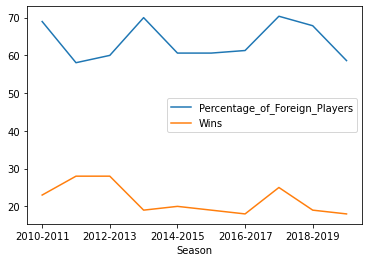

In [15]:
df_players_w_percentage[['Percentage_of_Foreign_Players','Wins']].plot()



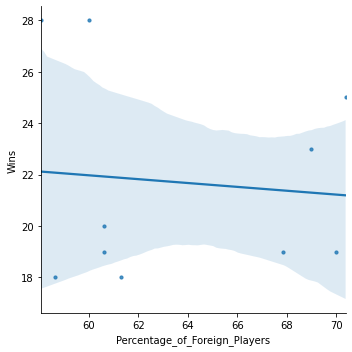

In [25]:
sns.lmplot('Percentage_of_Foreign_Players', 'Wins',
           data=df_players_w_percentage,
           fit_reg=True,
           scatter_kws={"marker": "D",
                        "s": 10})


*** 

All 2 graphs above does not tell us anything clearly. Let me calculate the correlation between these 2 variables: 

***

In [26]:
df_players_w_percentage.Percentage_of_Foreign_Players.corr(df_players_w_percentage.Wins)

-0.093838775262962

***

It is now obvious that there is a very weak negative correlation that is so close to 0 between the percentage of the foreign players in Manchester Utd and the number of the points they have scored..  In other words, there is no any obvious correlation statistically observed for this step..

***



***

Let's check it further by finding out the  between the number of the goals that the foreign players hold and the total number of the points that the team scored..

I will first check if the total number of the goals achieved by both English players and others..

***

In [18]:
df_all_seasons_squad_clean

,Player,Nation,Season,Position,Age,Matches_Played,Mins_Played,Goals,Assists,CrdY,CrdR
0,Nemanja Vidić,SRB,2010-2011,DF,28,35,3116.0,5.0,1.0,7.0,1.0
1,Patrice Evra,FRA,2010-2011,DF,29,35,2957.0,1.0,0.0,1.0,0.0
2,Edwin van der Sar,NED,2010-2011,GK,39,33,2970.0,0.0,0.0,1.0,0.0
3,Nani,POR,2010-2011,FWMF,23,33,2659.0,9.0,14.0,1.0,0.0
4,Wayne Rooney,ENG,2010-2011,FWMF,24,28,2225.0,11.0,11.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
309,Diogo Dalot,POR,2019-2020,DF,20,4,67.0,0.0,0.0,0.0,0.0
310,Odion Ighalo,NGA,2019-2020,FW,30,11,101.0,0.0,0.0,0.0,0.0
311,Tahith Chong,NED,2019-2020,FWMF,19,3,37.0,0.0,0.0,0.0,0.0
312,Angel Gomes,ENG,2019-2020,MF,18,2,21.0,0.0,0.0,0.0,0.0


***
First, English players..
***

In [27]:
df_goals_english = df_all_seasons_squad_clean.loc[df_all_seasons_squad_clean.Nation=='ENG']
df_goals_english = df_goals_english.groupby('Season').sum()[['Goals']]

df_goals_english

,Goals
Season,
2010-2011,14.0
2011-2012,50.0
2012-2013,19.0
2013-2014,34.0
2014-2015,20.0
2015-2016,18.0
2016-2017,13.0
2017-2018,21.0
2018-2019,18.0


***
Second, others...
***

In [28]:
df_goals_others = df_all_seasons_squad_clean.loc[~(df_all_seasons_squad_clean.Nation=='ENG')]


df_goals_others = df_goals_others.groupby('Season').sum()[['Goals']]

df_goals_others

,Goals
Season,
2010-2011,61.0
2011-2012,37.0
2012-2013,61.0
2013-2014,29.0
2014-2015,40.0
2015-2016,28.0
2016-2017,41.0
2017-2018,46.0
2018-2019,47.0


***

Merging these 2 tables to before plotting and calculate the percentage of the goals for both English and foreign players..

***

In [29]:
#Renaming the 'Goals' columns before merging...
df_goals_english= df_goals_english.rename(columns={'Goals': 'Goals_English'})
df_goals_others = df_goals_others.rename(columns={'Goals': 'Goals_Others'})

#Now merging 2 dataframes aboved based on index, which is 'Season'..
df_goals_final = pd.merge(df_goals_english, df_goals_others, left_index=True, right_index=True)


df_goals_final




,Goals_English,Goals_Others
Season,,
2010-2011,14.0,61.0
2011-2012,50.0,37.0
2012-2013,19.0,61.0
2013-2014,34.0,29.0
2014-2015,20.0,40.0
2015-2016,18.0,28.0
2016-2017,13.0,41.0
2017-2018,21.0,46.0
2018-2019,18.0,47.0


***

Percentage calculation..


***

In [30]:
#finding out percentage of each one..
df_goals_final = percentage_data(df_goals_final, df_goals_final.Goals_English, 
                                        (df_goals_final.Goals_English + df_goals_final.Goals_Others),
                                 'Percentage_of_Goals_English')

df_goals_final = percentage_data(df_goals_final, df_goals_final.Goals_Others, 
                                        (df_goals_final.Goals_English + df_goals_final.Goals_Others),
                                 'Percentage_of_Goals_Others')


#fetching only the percentage values since the goal values are not needed anymore..
df_goals_final = df_goals_final [['Percentage_of_Goals_English', 'Percentage_of_Goals_Others']]


df_goals_final

,Percentage_of_Goals_English,Percentage_of_Goals_Others
Season,,
2010-2011,18.67,81.33
2011-2012,57.47,42.53
2012-2013,23.75,76.25
2013-2014,53.97,46.03
2014-2015,33.33,66.67
2015-2016,39.13,60.87
2016-2017,24.07,75.93
2017-2018,31.34,68.66
2018-2019,27.69,72.31


***
I will plot a barchar to compare these 2 columns to get a visual insight..
***

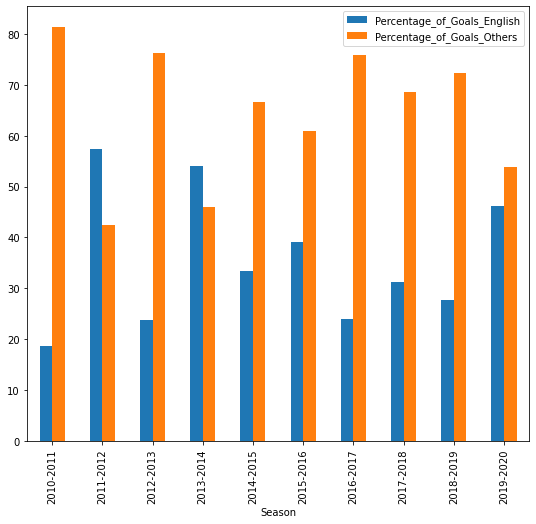

In [31]:
df_goals_final.plot(kind='bar', figsize=(9,8))

***

This graph shows that based on the data that I have used, except for Seasons 2011-2012 and 2013-2014, the goals are mostly achieved by the foreign players.. 

***

***

As a final step, let me check if there is any correlation between the percentage of the goals done by foreigners
and English vs for the wins

***



In [33]:
df_goals_final_w_wins = pd.merge(df_players_w_percentage.Wins, df_goals_final, left_index=True, right_index=True)

df_goals_final_w_wins

,Wins,Percentage_of_Goals_English,Percentage_of_Goals_Others
Season,,,
2010-2011,23,18.67,81.33
2011-2012,28,57.47,42.53
2012-2013,28,23.75,76.25
2013-2014,19,53.97,46.03
2014-2015,20,33.33,66.67
2015-2016,19,39.13,60.87
2016-2017,18,24.07,75.93
2017-2018,25,31.34,68.66
2018-2019,19,27.69,72.31


***

Now let's see if there exists any correlation..

***

In [34]:
df_goals_final_w_wins.Wins.corr(df_goals_final_w_wins.Percentage_of_Goals_Others)

0.006755736588195195

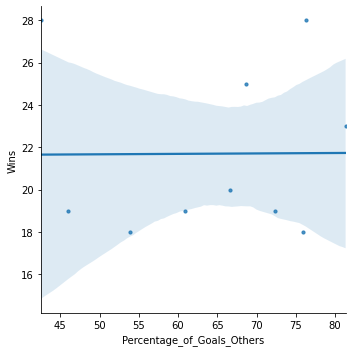

In [35]:
sns.lmplot('Percentage_of_Goals_Others', 'Wins',
           data=df_goals_final_w_wins,
           fit_reg=True,
           scatter_kws={"marker": "D",
                        "s": 10})